In [1]:
import numpy as np
import pandas as pd

We collected our data from several sources:

- basketball-reference.com
- wikipedia
- stathead.com

To bea able to integrate this data with our models, we have to clean it

# Data Cleaning

In [2]:
# This code reads all the season data into a dictionary

seasons_dict = {}
for i in range(42):
    key = str(1979 + i) + "-" + str(80+i)[-2:]
    file_path = "data/seasons/" + key + ".csv"
    season_df = pd.read_csv(file_path)
    year_array = np.array([key for x in range(len(season_df))])
    season_df["Year"] = year_array
    seasons_dict[key] = season_df
    
seasons_dict['2018-19']

Rk                  Player Pos  Age   Tm   G  GS    MP   FG  FGA  ...  \
0      1  Álex Abrines\abrinal01  SG   25  OKC  31   2   588   56  157  ...   
1      2      Quincy Acy\acyqu01  PF   28  PHO  10   0   123    4   18  ...   
2      3  Jaylen Adams\adamsja01  PG   22  ATL  34   1   428   38  110  ...   
3      4  Steven Adams\adamsst01   C   25  OKC  80  80  2669  481  809  ...   
4      5   Bam Adebayo\adebaba01   C   21  MIA  82  28  1913  280  486  ...   
..   ...                     ...  ..  ...  ...  ..  ..   ...  ...  ...  ...   
703  528  Tyler Zeller\zellety01   C   29  MEM   4   1    82   16   28  ...   
704  529    Ante Žižić\zizican01   C   22  CLE  59  25  1082  183  331  ...   
705  530   Ivica Zubac\zubaciv01   C   21  TOT  59  37  1040  212  379  ...   
706  530   Ivica Zubac\zubaciv01   C   21  LAL  33  12   516  112  193  ...   
707  530   Ivica Zubac\zubaciv01   C   21  LAC  26  25   524  100  186  ...   

     ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS     Year  
0      5   43   48   20   17    6   14   53   165  2018-19  
1      3   22   25    8    1    4    4   24    17  2018-19  
2     11   49   60   65   14    5   28   45   108  2018-19  
3    391  369  760  124  117   76  135  204  1108  2018-19  
4    165  432  597  184   71   65  121  203   729  2018-19  
..   ...  ...  ...  ...  ...  ...  ...  ...   ...      ...  
703    9    9   18    3    1    3    4   16    46  2018-19  
704  108  212  320   53   13   22   61  113   459  2018-19  
705  115  247  362   63   14   51   70  137   525  2018-19  
706   54  108  162   25    4   27   33   73   281  2018-19  
707   61  139  200   38   10   24   37   64   244  2018-19  

[708 rows x 31 columns]

In [3]:
halloffame = pd.read_csv("data/halloffame.csv")
halloffame.info()
halloffame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          199 non-null    int64 
 1   Inductees     199 non-null    object
 2   Pos.          198 non-null    object
 3   Achievements  199 non-null    object
 4   Ref.          191 non-null    object
dtypes: int64(1), object(4)
memory usage: 7.9+ KB


Year            Inductees Pos.  \
0    1959          Chuck Hyatt    G   
1    1959        Hank Luisetti    F   
2    1959         George Mikan    C   
3    1959        John Schommer    G   
4    1960           Vic Hanson    G   
..    ...                  ...  ...   
194  2019          Bobby Jones    F   
195  2019      Sidney Moncrief    G   
196  2019           Jack Sikma  F/C   
197  2019  Teresa Weatherspoon    G   
198  2019        Paul Westphal    G   

                                          Achievements Ref.  
0    National championship (Pittsburgh, 1928, 1930)...  [3]  
1    3 Pacific Coast Conference championships (Stan...  [4]  
2    All-America (DePaul, 1944–45); All-NBA First-T...  [5]  
3    Big Ten Championships (Chicago, 1907–09); All-...  [6]  
4    Helms Foundation Championship (Syracuse, 1926)...  [7]  
..                                                 ...  ...  
194  NBA champion (1983)4× NBA All-Star (1977, 1978...  NaN  
195  5x NBA All-Star (1982–1986)All-NBA First Team ...  NaN  
196  NBA champion (1979)7× NBA All-Star (1979–1985)...  NaN  
197  First WNBA player with 1,000 points and 1,000 ...  NaN  
198  NBA champion (1974)5× NBA All-Star (1977–1981)...  NaN  

[199 rows x 5 columns]

In [4]:
# This code removes players who played less than 40 games 
# or less than 10 minutes on average per game in each season

for key in seasons_dict.keys():
    temp_df = seasons_dict[key]
    temp_df = temp_df[temp_df['G'] >= 40]
    temp_df = temp_df[temp_df['MP'] / temp_df['G'] >= 10]
    seasons_dict[key] = temp_df.reset_index().drop(columns=["index"])
    
seasons_dict['2018-19']

Rk                       Player Pos  Age   Tm   G  GS    MP   FG   FGA  \
0      4       Steven Adams\adamsst01   C   25  OKC  80  80  2669  481   809   
1      5        Bam Adebayo\adebaba01   C   21  MIA  82  28  1913  280   486   
2      8  LaMarcus Aldridge\aldrila01   C   33  SAS  81  81  2687  684  1319   
3     11      Jarrett Allen\allenja01   C   20  BRK  80  80  2096  335   568   
4     13    Al-Farouq Aminu\aminual01  PF   28  POR  81  81  2292  257   593   
..   ...                          ...  ..  ...  ...  ..  ..   ...  ...   ...   
376  525     Thaddeus Young\youngth01  PF   30  IND  81  81  2489  443   841   
377  526         Trae Young\youngtr01  PG   20  ATL  81  81  2503  525  1256   
378  527        Cody Zeller\zelleco01   C   26  CHO  49  47  1243  190   345   
379  529         Ante Žižić\zizican01   C   22  CLE  59  25  1082  183   331   
380  530        Ivica Zubac\zubaciv01   C   21  TOT  59  37  1040  212   379   

     ...  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS     Year  
0    ...  391  369  760  124  117   76  135  204  1108  2018-19  
1    ...  165  432  597  184   71   65  121  203   729  2018-19  
2    ...  251  493  744  194   43  107  144  179  1727  2018-19  
3    ...  191  481  672  110   43  120  103  184   873  2018-19  
4    ...  112  498  610  104   68   33   72  143   760  2018-19  
..   ...  ...  ...  ...  ...  ...  ...  ...  ...   ...      ...  
376  ...  192  331  523  204  123   36  123  194  1024  2018-19  
377  ...   64  237  301  653   72   15  308  140  1549  2018-19  
378  ...  110  223  333  102   38   41   62  164   497  2018-19  
379  ...  108  212  320   53   13   22   61  113   459  2018-19  
380  ...  115  247  362   63   14   51   70  137   525  2018-19  

[381 rows x 31 columns]

In [5]:
# This code splits up player names and player IDs, forming a column for each

for key in seasons_dict.keys():
    temp_df = seasons_dict[key]
    player_temp = [temp_df["Player"][x].split("\\") for x in range(len(temp_df))]
    temp_df["Player_ID"] = [x[1] for x in player_temp]
    temp_df["Player"] = [x[0] for x in player_temp]
    seasons_dict[key] = temp_df
    
seasons_dict['2018-19']

Rk             Player Pos  Age   Tm   G  GS    MP   FG   FGA  ...  DRB  \
0      4       Steven Adams   C   25  OKC  80  80  2669  481   809  ...  369   
1      5        Bam Adebayo   C   21  MIA  82  28  1913  280   486  ...  432   
2      8  LaMarcus Aldridge   C   33  SAS  81  81  2687  684  1319  ...  493   
3     11      Jarrett Allen   C   20  BRK  80  80  2096  335   568  ...  481   
4     13    Al-Farouq Aminu  PF   28  POR  81  81  2292  257   593  ...  498   
..   ...                ...  ..  ...  ...  ..  ..   ...  ...   ...  ...  ...   
376  525     Thaddeus Young  PF   30  IND  81  81  2489  443   841  ...  331   
377  526         Trae Young  PG   20  ATL  81  81  2503  525  1256  ...  237   
378  527        Cody Zeller   C   26  CHO  49  47  1243  190   345  ...  223   
379  529         Ante Žižić   C   22  CLE  59  25  1082  183   331  ...  212   
380  530        Ivica Zubac   C   21  TOT  59  37  1040  212   379  ...  247   

     TRB  AST  STL  BLK  TOV   PF   PTS     Year  Player_ID  
0    760  124  117   76  135  204  1108  2018-19  adamsst01  
1    597  184   71   65  121  203   729  2018-19  adebaba01  
2    744  194   43  107  144  179  1727  2018-19  aldrila01  
3    672  110   43  120  103  184   873  2018-19  allenja01  
4    610  104   68   33   72  143   760  2018-19  aminual01  
..   ...  ...  ...  ...  ...  ...   ...      ...        ...  
376  523  204  123   36  123  194  1024  2018-19  youngth01  
377  301  653   72   15  308  140  1549  2018-19  youngtr01  
378  333  102   38   41   62  164   497  2018-19  zelleco01  
379  320   53   13   22   61  113   459  2018-19  zizican01  
380  362   63   14   51   70  137   525  2018-19  zubaciv01  

[381 rows x 32 columns]

In [6]:
# This code accounts for players who have been traded

for key in seasons_dict:
    temp_df = seasons_dict[key]
    player_id_list = temp_df["Player_ID"]
    duplicates = [x for x in np.unique(player_id_list) if len([y for y in player_id_list if y==x]) > 1]
    for name in duplicates:
        new_temp = temp_df[ (temp_df["Player_ID"] == name)  & (temp_df["Tm"] == "TOT")]
        temp_df = temp_df[temp_df["Player_ID"] != name]
        temp_df = pd.concat([new_temp, temp_df])
    seasons_dict[key] = temp_df

In [7]:
# This code replaces Nan values with 0s

for key in seasons_dict:
    seasons_dict[key] = seasons_dict[key].fillna(0)

In [12]:
# Converting all stats into z scores

import scipy.stats as spt

sample_season_df = seasons_dict['2018-19']

column_names_zscore = list(sample_season_df.columns[8:-2]) 
column_names_keep = list(sample_season_df.columns[:8]) + [sample_season_df.columns[-2]] + [sample_season_df.columns[-1]]

zscores_dict = {}
for key in seasons_dict:
    new_temp_df = seasons_dict[key][column_names_keep]
    for col in column_names_zscore:
        col_name = col + "_zscore"
        new_temp_df[col_name] = spt.zscore(seasons_dict[key][col])
    zscores_dict[key] = new_temp_df
    
zscores_dict['2018-19']

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


Rk            Player    Pos  Age   Tm   G  GS    MP     Year  Player_ID  \
374  522      Delon Wright     PG   26  TOT  75  13  1699  2018-19  wrighde01   
343  469    Garrett Temple     SG   32  TOT  75  55  2040  2018-19  templga01   
338  462      Nik Stauskas     SG   25  TOT  68   0  1015  2018-19  stausni01   
331  450  Jonathon Simmons  SG-SF   29  TOT  56   9  1064  2018-19  simmojo02   
327  446     Iman Shumpert     SG   28  TOT  62  41  1481  2018-19  shumpim01   
..   ...               ...    ...  ...  ...  ..  ..   ...      ...        ...   
376  525    Thaddeus Young     PF   30  IND  81  81  2489  2018-19  youngth01   
377  526        Trae Young     PG   20  ATL  81  81  2503  2018-19  youngtr01   
378  527       Cody Zeller      C   26  CHO  49  47  1243  2018-19  zelleco01   
379  529        Ante Žižić      C   22  CLE  59  25  1082  2018-19  zizican01   
380  530       Ivica Zubac      C   21  TOT  59  37  1040  2018-19  zubaciv01   

     ...  FT%_zscore  ORB_zscore  DRB_zscore  TRB_zscore  AST_zscore  \
374  ...    0.400685   -0.017838   -0.245465   -0.186108    0.628750   
343  ...   -0.081505   -0.665305   -0.317223   -0.449649   -0.440222   
338  ...    1.450788   -0.827172   -0.884116   -0.918752   -0.628421   
331  ...   -0.145797   -0.681492   -0.955875   -0.924023   -0.274606   
327  ...    0.475692   -0.681492   -0.546851   -0.623586   -0.395054   
..   ...         ...         ...         ...         ...         ...   
376  ...   -1.195901    1.989308    0.708925    1.168494    0.297519   
377  ...    0.786437   -0.082585    0.034394   -0.001629    3.677578   
378  ...    0.336393    0.662002   -0.066068    0.167037   -0.470334   
379  ...   -0.542265    0.629628   -0.145003    0.098517   -0.839204   
380  ...    0.497123    0.742935    0.106153    0.319891   -0.763924   

     STL_zscore  BLK_zscore  TOV_zscore  PF_zscore  PTS_zscore  
374    1.254597   -0.090464   -0.223633  -0.653296   -0.206671  
343    0.851952   -0.090464   -0.341436   1.299938   -0.352286  
338   -0.993504   -0.822434   -0.661186  -1.678260   -0.758703  
331   -0.725074   -0.567836   -0.375094  -0.924041   -0.830424  
327    0.281538   -0.281413   -0.678015  -0.189161   -0.615262  
..          ...         ...         ...        ...         ...  
376    2.428978    0.100485    0.550498   1.106549    0.599643  
377    0.717737   -0.567836    3.663850   0.062245    1.740653  
378   -0.423090    0.259609   -0.476068   0.526380   -0.545714  
379   -1.261934   -0.345062   -0.492896  -0.459906   -0.628302  
380   -1.228380    0.577856   -0.341436   0.004229   -0.484860  

[343 rows x 32 columns]

In [13]:
# This code gets all player names and IDs

player_names_id_df = pd.DataFrame(columns = ["Player", "Player_ID"])
for df in zscores_dict.values():
    temp_df = df[["Player", "Player_ID"]]
    player_names_id_df = pd.concat([player_names_id_df,temp_df])

player_names_id_df

Player  Player_ID
210     Robert Smith  smithro01
206      Bingo Smith  smithbi02
179    Roger Phegley  pheglro01
175     Billy Paultz  paultbi01
167      Calvin Natt   nattca01
..               ...        ...
277  Zion Williamson  willizi01
278     Delon Wright  wrighde01
279   Thaddeus Young  youngth01
280       Trae Young  youngtr01
281      Ivica Zubac  zubaciv01

[12048 rows x 2 columns]

In [14]:
# This function takes out all non-alphanumeric characters from a string

def string_filter(string):
    word = filter(str.isalnum, string)
    word = "".join(word)
    return word.lower()

In [15]:
# This code makes a Player ID to Player Name dictionary

name_id_df = player_names_id_df.drop_duplicates().reset_index()[["Player", "Player_ID"]]
player_names = name_id_df["Player"].apply(string_filter)
name_id_df["Player"] = player_names
player_to_ID = {}
for i in range(len(name_id_df["Player"])):
    player_to_ID[name_id_df["Player"][i]] = name_id_df["Player_ID"][i]
player_to_ID


ID_to_Player = {}
for i in range(len(name_id_df["Player"])):
    ID_to_Player[name_id_df["Player_ID"][i]] = name_id_df["Player"][i]
    
ID_to_Player

{'smithro01': 'robertsmith',
 'smithbi02': 'bingosmith',
 'pheglro01': 'rogerphegley',
 'paultbi01': 'billypaultz',
 'nattca01': 'calvinnatt',
 'moneyer01': 'ericmoney',
 'mcginge01': 'georgemcginnis',
 'lucasma01': 'mauricelucas',
 'landsma01': 'marklandsberger',
 'kelleri01': 'richkelley',
 'jonesdw01': 'dwightjones',
 'furlote01': 'terryfurlow',
 'forddo01': 'donford',
 'englial01': 'alexenglish',
 'cleamji01': 'jimcleamons',
 'carrke01': 'kennycarr',
 'bosweto01': 'tomboswell',
 'boonero01': 'ronboone',
 'bensoke01': 'kentbenson',
 'abdulka01': 'kareemabduljabbar',
 'abernto01': 'tomabernethy',
 'adamsal01': 'alvanadams',
 'architi01': 'tinyarchibald',
 'baileja01': 'jamesbailey',
 'ballagr01': 'gregballard',
 'bantomi01': 'mikebantom',
 'barryri01': 'rickbarry',
 'beshode01': 'delbeshore',
 'bibbyhe01': 'henrybibby',
 'birdla01': 'larrybird',
 'birdsot01': 'otisbirdsong',
 'boynewi01': 'winfordboynes',
 'bradldu01': 'dudleybradley',
 'bratzmi01': 'mikebratz',
 'breweji01': 'jimbre

## Creating a Dataframe to address the All-star prediction problem

In [19]:
# This code loads in the all-star data

all_stars_df = pd.read_csv("data/allstars.csv")
all_stars_df.info()

# This code creates a dictionary that matches a player to the years they were all-stars
all_stars_selections = [x.split(";") for x in all_stars_df["Selections[c]"]]
all_star_player = list(all_stars_df["Player"].apply(string_filter))
all_star_zip = list(zip(all_star_player, all_stars_selections))


def count_dict(key, item, dct):
    if key in dct.keys():
        dct[key] += [item]
    else:
        dct[key] = [item]

def year_dash_parsing(lst):
    year_and_allstars = {}
    for item in lst:
        for word in item[1]:
            if "‚Äì" in word:
                years = word.split("‚Äì")
                list_of_years = range(int(years[0]), int(years[1]) + 1)
                [count_dict(str(x),item[0], year_and_allstars) for x in list_of_years]
            else:
                count_dict(string_filter(word),item[0], year_and_allstars)
    return year_and_allstars

all_star_years = year_dash_parsing(all_star_zip)
all_star_zip

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Player         437 non-null    object
 1   #              437 non-null    int64 
 2   Selections[c]  437 non-null    object
 3   Notes          92 non-null     object
 4   Reference      437 non-null    object
dtypes: int64(1), object(4)
memory usage: 17.2+ KB


[('kareemabduljabbar', ['1970‚Äì1977', ' 1979‚Äì1989']),
 ('kobebryant', ['1998', ' 2000‚Äì2016']),
 ('lebronjames', ['2005‚Äì2021']),
 ('timduncan', ['1998', ' 2000‚Äì2011', ' 2013', ' 2015']),
 ('kevingarnett', ['1997‚Äì1998', ' 2000‚Äì2011', ' 2013']),
 ('shaquilleoneal', ['1993‚Äì1998', ' 2000‚Äì2007', ' 2009']),
 ('michaeljordan', ['1985‚Äì1993', ' 1996‚Äì1998', ' 2002‚Äì2003']),
 ('karlmalone', ['1988‚Äì1998', ' 2000‚Äì2002']),
 ('dirknowitzki', ['2002‚Äì2012', ' 2014‚Äì2015', ' 2019']),
 ('jerrywest', ['1961‚Äì1974']),
 ('wiltchamberlain', ['1960‚Äì1969', ' 1971‚Äì1973']),
 ('bobcousy', ['1951‚Äì1963']),
 ('johnhavlicek', ['1966‚Äì1978']),
 ('dwyanewade', ['2005‚Äì2016', ' 2019']),
 ('larrybird', ['1980‚Äì1988', ' 1990‚Äì1992']),
 ('elvinhayes', ['1969‚Äì1980']),
 ('magicjohnson', ['1980', ' 1982‚Äì1992']),
 ('mosesmalone', ['1978‚Äì1989']),
 ('hakeemolajuwon', ['1985‚Äì1990', ' 1992‚Äì1997']),
 ('oscarrobertson', ['1961‚Äì1972']),
 ('billrussell', ['1958‚Äì1969']),
 ('dolphscha

In [21]:
# This code makes a list of all the Player IDs of all-star players

all_star_player_ids = []
keys_all_star_years = list(seasons_dict.keys())[:35]

for key in keys_all_star_years:
    all_star_player_ids += list(zscores_dict[key]["Player_ID"])
    
all_star_player_ids = np.unique(all_star_player_ids)
all_star_player_ids

array(['abdelal01', 'abdulka01', 'abdulma02', ..., 'zellety01',
       'zhizhwa01', 'zidekge01'], dtype='<U9')

In [22]:
# This code creates the data of all the all-star players and their statistics

all_star_player_dict = {}
stat_columns = zscores_dict['1979-80'].columns[9:]
all_star_data = []


for player in all_star_player_ids:
    all_star_player_dict[player] = 1
    player_name = ID_to_Player[player]
    
    
    player_row = [player_name, player]
    for year in keys_all_star_years:
        if player in list(zscores_dict[year]["Player_ID"]) and all_star_player_dict[player]<3:
            player_row += list(zscores_dict[year][zscores_dict[year].Player_ID == player].values[0][9:])
            player_row += [year]
            all_star_player_dict[player]+= 1
    all_star_data.append(player_row)

all_star_data

[['alaaabdelnaby',
  'abdelal01',
  'abdelal01',
  -0.7790290093822673,
  -0.8561946225072145,
  0.5305064870805484,
  -0.6049750367915017,
  -0.6804047065896898,
  -1.2117768796235235,
  -0.715833302877377,
  -0.7692383180687729,
  0.27610734208018983,
  0.257970693751229,
  -0.7411794832771118,
  -0.7703590216516254,
  0.06751086057786693,
  -0.36808755953735106,
  -0.3152535927960798,
  -0.34333200217049153,
  -0.9574115320605034,
  -0.9694550356537944,
  -0.5345024383683769,
  -0.8237531959523722,
  -0.5696843507807222,
  -0.8118919423988298,
  '1991-92',
  'abdelal01',
  -0.35108707514203424,
  -0.4853003228661755,
  1.1422126883909824,
  -0.6613391861505051,
  -0.728454392257055,
  -1.348173939810477,
  -0.23418112886986933,
  -0.3287989426865309,
  0.8695883198319175,
  0.782651122094331,
  -0.6107398420801969,
  -0.637798194149411,
  0.1537447510055858,
  0.3097490952890726,
  -0.0653673219816322,
  0.058193756260210346,
  -0.9963389546769599,
  -0.9650676141937913,
  -0.278394

In [20]:
all_star = pd.read_csv("all_star.csv")
all_star.info()
all_star.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 48 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       777 non-null    int64  
 1   Players          777 non-null    object 
 2   Player_ID        777 non-null    object 
 3   yr1_FG_zscore    777 non-null    float64
 4   yr1_FGA_zscore   777 non-null    float64
 5   yr1_FG%_zscore   777 non-null    float64
 6   yr1_3P_zscore    777 non-null    float64
 7   yr1_3PA_zscore   777 non-null    float64
 8   yr1_3P%_zscore   777 non-null    float64
 9   yr1_2P_zscore    777 non-null    float64
 10  yr1_2PA_zscore   777 non-null    float64
 11  yr1_2P%_zscore   777 non-null    float64
 12  yr1_eFG%_zscore  777 non-null    float64
 13  yr1_FT_zscore    777 non-null    float64
 14  yr1_FTA_zscore   777 non-null    float64
 15  yr1_FT%_zscore   777 non-null    float64
 16  yr1_ORB_zscore   777 non-null    float64
 17  yr1_DRB_zscore  

Unnamed: 0            Players  Player_ID  yr1_FG_zscore  yr1_FGA_zscore  \
0           0   mahmoudabdulrauf  abdulma02       0.596186        0.967948   
1           1  shareefabdurrahim  abdursh01       1.634346        1.705472   
2           2          quincyacy    acyqu01      -1.200929       -1.246295   
3           3       michaeladams  adamsmi01      -0.705408       -0.590452   
4           4        stevenadams  adamsst01      -1.032681       -1.117707   

   yr1_FG%_zscore  yr1_3P_zscore  yr1_3PA_zscore  yr1_3P%_zscore  \
0       -1.228454       0.272609        0.622391        0.299565   
1        0.017134      -0.695490       -0.680417       -0.024022   
2        0.221920      -0.903841       -0.938905       -0.011716   
3       -1.340184       0.925378        1.301900        0.771885   
4        0.810659      -0.977510       -1.045779       -1.660113   

   yr1_2P_zscore  ...  yr2_ORB_zscore  yr2_DRB_zscore  yr2_TRB_zscore  \
0       0.583687  ...       -1.005665       -0.781507       -0.881680   
1       2.045095  ...        1.843080        1.091669        1.400362   
2      -1.005769  ...        0.112265        0.058055        0.079612   
3      -0.810567  ...       -0.842317       -0.206127       -0.434449   
4      -0.788716  ...        1.991555        0.849406        1.285898   

   yr2_AST_zscore  yr2_STL_zscore  yr2_BLK_zscore  yr2_TOV_zscore  \
0        0.092281       -0.417967       -0.733730        0.135709   
1        0.376102        0.779952        0.909764        2.453190   
2       -0.592961       -0.751069       -0.285703       -0.541849   
3        1.755812        2.408113       -0.516622        0.394585   
4       -0.608147       -0.405471        1.587762        0.163024   

   yr2_PF_zscore    Year2  Is_Allstar  
0      -0.414734  1991-92           0  
1       0.658340  1997-98           1  
2       0.299014  2014-15           0  
3      -0.507176  1987-88           1  
4       1.794082  2014-15           0  

[5 rows x 48 columns]

In [23]:
all_star.head()

Unnamed: 0            Players  Player_ID  yr1_FG_zscore  yr1_FGA_zscore  \
0           0   mahmoudabdulrauf  abdulma02       0.596186        0.967948   
1           1  shareefabdurrahim  abdursh01       1.634346        1.705472   
2           2          quincyacy    acyqu01      -1.200929       -1.246295   
3           3       michaeladams  adamsmi01      -0.705408       -0.590452   
4           4        stevenadams  adamsst01      -1.032681       -1.117707   

   yr1_FG%_zscore  yr1_3P_zscore  yr1_3PA_zscore  yr1_3P%_zscore  \
0       -1.228454       0.272609        0.622391        0.299565   
1        0.017134      -0.695490       -0.680417       -0.024022   
2        0.221920      -0.903841       -0.938905       -0.011716   
3       -1.340184       0.925378        1.301900        0.771885   
4        0.810659      -0.977510       -1.045779       -1.660113   

   yr1_2P_zscore  ...  yr2_ORB_zscore  yr2_DRB_zscore  yr2_TRB_zscore  \
0       0.583687  ...       -1.005665       -0.781507       -0.881680   
1       2.045095  ...        1.843080        1.091669        1.400362   
2      -1.005769  ...        0.112265        0.058055        0.079612   
3      -0.810567  ...       -0.842317       -0.206127       -0.434449   
4      -0.788716  ...        1.991555        0.849406        1.285898   

   yr2_AST_zscore  yr2_STL_zscore  yr2_BLK_zscore  yr2_TOV_zscore  \
0        0.092281       -0.417967       -0.733730        0.135709   
1        0.376102        0.779952        0.909764        2.453190   
2       -0.592961       -0.751069       -0.285703       -0.541849   
3        1.755812        2.408113       -0.516622        0.394585   
4       -0.608147       -0.405471        1.587762        0.163024   

   yr2_PF_zscore    Year2  Is_Allstar  
0      -0.414734  1991-92           0  
1       0.658340  1997-98           1  
2       0.299014  2014-15           0  
3      -0.507176  1987-88           1  
4       1.794082  2014-15           0  

[5 rows x 48 columns]

In [24]:
len(all_star.columns)

48

## Train/Test Split for All-Star data 

In [25]:
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

In [26]:
all_star_train, all_star_test = train_test_split(all_star, test_size=0.3, random_state=88)
all_star_train.shape, all_star_test.shape

((543, 48), (234, 48))

In [27]:
# Basic string manipulation for building the model
all_star_train.columns = all_star_train.columns.str.replace("%","z")
all_star_test.columns = all_star_test.columns.str.replace("%","z")

In [28]:
def formula_from_cols(df, y):
    return y + ' ~ ' + ' + '.join([col for col in df.columns 
                                   if not ((col == 'Unnamed: 0') or (col == 'Year2') or (col == 'Year1')
                                    or (col == 'Players') or (col == 'Player_ID') or (col == 'Is_Allstar')) ])

In [29]:
all_formula = formula_from_cols(all_star_train, 'Is_Allstar')
all_formula

'Is_Allstar ~ yr1_FG_zscore + yr1_FGA_zscore + yr1_FGz_zscore + yr1_3P_zscore + yr1_3PA_zscore + yr1_3Pz_zscore + yr1_2P_zscore + yr1_2PA_zscore + yr1_2Pz_zscore + yr1_eFGz_zscore + yr1_FT_zscore + yr1_FTA_zscore + yr1_FTz_zscore + yr1_ORB_zscore + yr1_DRB_zscore + yr1_TRB_zscore + yr1_AST_zscore + yr1_STL_zscore + yr1_BLK_zscore + yr1_TOV_zscore + yr1_PF_zscore + yr2_FG_zscore + yr2_FGA_zscore + yr2_FGz_zscore + yr2_3P_zscore + yr2_3PA_zscore + yr2_3Pz_zscore + yr2_2P_zscore + yr2_2PA_zscore + yr2_2Pz_zscore + yr2_eFGz_zscore + yr2_FT_zscore + yr2_FTA_zscore + yr2_FTz_zscore + yr2_ORB_zscore + yr2_DRB_zscore + yr2_TRB_zscore + yr2_AST_zscore + yr2_STL_zscore + yr2_BLK_zscore + yr2_TOV_zscore + yr2_PF_zscore'

## Creating a Dataframe to address the Hall of Fame prediction problem

In [33]:
players_draft_data = pd.read_csv("data/draft_classes_1979-99.csv")
players_draft_data["Years_Played"] = players_draft_data["To"] - players_draft_data["From"]
players_draft_data = players_draft_data[players_draft_data["Years_Played"] >= 10 ].reset_index().drop(columns=["index"])
player_list_79_99 = players_draft_data["Player"].apply(string_filter)
players_draft_data["Player"] = player_list_79_99
players_draft_data["Player_ID"] = [player_to_ID[x] for x in players_draft_data["Player"]]
players_draft_data

Rk   Lg  Rd   Pk   Tm           Player     Age  Pos Born  \
0      1  NBA   1    1  CHI       eltonbrand  20.116  F-C   us   
1      3  NBA   1    3  CHH       barondavis  20.083    G   us   
2      4  NBA   1    4  LAC        lamarodom  19.241    F   us   
3      5  NBA   1    5  TOR   jonathanbender  18.155    F   us   
4      7  NBA   1    7  WAS  richardhamilton  21.141  G-F   us   
..   ...  ...  ..  ...  ...              ...     ...  ...  ...   
297  800  NBA   3   58  PHI      earlcureton  21.300  F-C   us   
298  801  NBA   3   65  CLE     billlaimbeer  22.042    C   us   
299  802  NBA   4   73  SEA   jamesdonaldson  21.318    C   gb   
300  806  NBA   5  107  PHO        markeaton  22.157    C   us   
301  807  NBA   8  165  PHO     charlesjones  22.088  F-C   us   

                     College  ...  STL  BLK    FG%    2P%    3P%    FT%  \
0                       Duke  ...  0.9  1.7  0.500  0.501  0.095  0.736   
1                       UCLA  ...  1.8  0.4  0.409  0.456  0.320  0.711   
2               Rhode Island  ...  0.9  0.9  0.463  0.502  0.312  0.693   
3                        NaN  ...  0.2  0.6  0.417  0.442  0.340  0.763   
4                      UConn  ...  0.8  0.1  0.449  0.463  0.346  0.852   
..                       ...  ...  ...  ...    ...    ...    ...    ...   
297            Detroit Mercy  ...  0.5  0.5  0.473  0.476  0.000  0.538   
298               Notre Dame  ...  0.7  0.9  0.498  0.508  0.326  0.837   
299         Washington State  ...  0.4  1.3  0.571  0.571    NaN  0.732   
300                     UCLA  ...  0.4  3.5  0.458  0.458  0.000  0.649   
301  Albany State University  ...  0.6  1.6  0.480  0.482  0.000  0.618   

        WS  WS/48  Years_Played  Player_ID  
0    109.6  0.151          16.0  brandel01  
1     63.1  0.106          12.0  davisba01  
2     77.0  0.115          13.0   odomla01  
3      3.8  0.047          10.0  bendejo01  
4     62.8  0.102          13.0  hamilri01  
..     ...    ...           ...        ...  
297   14.4  0.056          16.0  curetea01  
298  105.6  0.149          13.0  laimbbi01  
299   62.3  0.114          14.0  donalja01  
300   44.8  0.085          10.0  eatonma01  
301   24.6  0.084          14.0  jonesch03  

[302 rows x 28 columns]

In [34]:
hall_of_fame_players = halloffame["Inductees"].apply(string_filter)
hall_of_fame_players

0              chuckhyatt
1            hankluisetti
2             georgemikan
3            johnschommer
4               vichanson
              ...        
194            bobbyjones
195        sidneymoncrief
196             jacksikma
197    teresaweatherspoon
198          paulwestphal
Name: Inductees, Length: 199, dtype: object

In [35]:
# This code creates a dataframe with all players and whether or not they are in the Hall of Fame

hof_df = pd.DataFrame(columns = ["Players", "Player_ID", "In_HoF"])
hof_df["Players"] = player_list_79_99
hof_df["Player_ID"] = [player_to_ID[x] for x in hof_df["Players"]]

for i in range(len(hof_df["Players"])):
    if hof_df["Players"][i] in list(hall_of_fame_players):
        hof_df.loc[i,["In_HoF"]] = 1
    else:
        hof_df.loc[i,["In_HoF"]] = 0
sum(hof_df["In_HoF"])

player_to_ID["michaeljordan"]
hof_df

Players  Player_ID In_HoF
0         eltonbrand  brandel01      0
1         barondavis  davisba01      0
2          lamarodom   odomla01      0
3     jonathanbender  bendejo01      0
4    richardhamilton  hamilri01      0
..               ...        ...    ...
297      earlcureton  curetea01      0
298     billlaimbeer  laimbbi01      0
299   jamesdonaldson  donalja01      0
300        markeaton  eatonma01      0
301     charlesjones  jonesch03      0

[302 rows x 3 columns]

In [37]:
# This code aggreagates all statistics for all players, including whether or not they are in the Hall of Fame

player_hof_dict = {}
stat_columns = zscores_dict['1979-80'].columns[10:]
hof_data = []
for player in hof_df["Player_ID"]:
    player_hof_dict[player] = 1
    player_row = list(hof_df.loc[hof_df.Player_ID == player].values[0])
    for year in zscores_dict.keys():
        if player in list(zscores_dict[year]["Player_ID"]) and player_hof_dict[player]<11:
            player_row += list(zscores_dict[year][zscores_dict[year].Player_ID == player].values[0][10:])
            player_hof_dict[player]+= 1
    hof_data.append(player_row)

hof_data

[['eltonbrand',
  'brandel01',
  0,
  2.0586697980335855,
  1.8892761673252236,
  0.730591872268197,
  -0.8724943494352995,
  -0.9005876961324917,
  -1.5084456830770367,
  2.4318251098372055,
  2.4257767305414446,
  0.42516725848308795,
  0.105062309326888,
  2.018329127218927,
  2.407416065952024,
  -0.5923531544386513,
  3.80989966419709,
  1.6782147950361266,
  2.475217956608277,
  -0.09757233612169333,
  0.17603560100688612,
  2.0682303043548385,
  1.8102081028540902,
  1.3561151711630601,
  1.9424387388522055,
  1.7434276404088915,
  1.5833450249243992,
  0.7324551285364537,
  -0.8117854480389016,
  -0.8524803788831299,
  -1.5062699309853964,
  2.146756262015698,
  2.1346355202628082,
  0.4291909376626303,
  0.10005851183501992,
  1.7103103312831847,
  1.9271694091826284,
  -0.2960402490751304,
  3.0141454410058612,
  1.6289619019296309,
  2.1433515585732765,
  0.5191772222200266,
  0.369594884662827,
  1.7700961120919558,
  1.8190416840830792,
  1.3072202732600726,
  1.6141646551

In [38]:
print("Amount of players processed: ", len(hof_data))
len_hof_df = len(hof_data[0])
len_hof_df
hof_data_correct = [x for x in hof_data if len(x) == len_hof_df]
print("Amount of players with", str(len_hof_df) ,"variables: ", len(hof_data_correct))

zscore_columns = zscores_dict["2005-06"].columns[10:]

Amount of players processed:  302
Amount of players with 223 variables:  218


In [39]:
hof_column_names = ["Players", "Player_ID", "In_HoF"]

zscore_columns = zscores_dict["2005-06"].columns[10:]

for i in range(1,11):
    temp_col = ["yr"+str(i)+"_"+ x for x in zscore_columns]
    hof_column_names += temp_col
    
print("length of column names: ", len(hof_column_names))

length of column names:  223


In [40]:
hof_df = pd.DataFrame(data = hof_data_correct, columns = hof_column_names)
hof_df

Players  Player_ID  In_HoF  yr1_FG_zscore  yr1_FGA_zscore  \
0         eltonbrand  brandel01       0       2.058670        1.889276   
1         barondavis  davisba01       0      -0.580376       -0.522227   
2          lamarodom   odomla01       0       0.992448        1.110303   
3    richardhamilton  hamilri01       0      -0.156244       -0.047109   
4        andremiller  millean02       0       0.344468        0.367239   
..               ...        ...     ...            ...             ...   
213    vinniejohnson  johnsvi01       0       0.454757        0.283567   
214        jimpaxson  paxsoji02       0      -0.786270       -0.651730   
215     billlaimbeer  laimbbi01       0       0.031087       -0.021189   
216   jamesdonaldson  donalja01       0      -1.043586       -1.166011   
217        markeaton  eatonma01       0      -0.952222       -0.863543   

     yr1_FG%_zscore  yr1_3P_zscore  yr1_3PA_zscore  yr1_3P%_zscore  \
0          0.730592      -0.872494       -0.900588       -1.508446   
1         -0.587001      -0.284260        0.059801       -0.176388   
2         -0.204474       0.515738        0.526779        0.622847   
3         -0.587001      -0.213672       -0.239770        0.646528   
4          0.029293      -0.637201       -0.486475       -0.300713   
..              ...            ...             ...             ...   
213        1.155580      -0.323431       -0.391557        0.369772   
214       -1.518724      -0.383606        0.014800       -0.746468   
215        0.495698      -0.439221       -0.579790       -0.824666   
216        1.325872      -0.439221       -0.579790       -0.824666   
217       -1.362690      -0.516626       -0.601422       -0.894499   

     yr1_2P_zscore  ...  yr10_FT%_zscore  yr10_ORB_zscore  yr10_DRB_zscore  \
0         2.431825  ...         0.303002         2.525366         1.653416   
1        -0.543808  ...         0.001754        -0.548713        -0.214636   
2         0.921990  ...        -0.556087         1.602701         2.758970   
3        -0.109731  ...         0.864987        -0.581300        -0.431168   
4         0.538240  ...         0.656293         0.705875         0.181095   
..             ...  ...              ...              ...              ...   
213       0.471873  ...        -0.812709         0.009482        -0.549234   
214      -0.768269  ...         0.601656        -1.235079        -1.232299   
215       0.050976  ...         1.102100         0.810778         2.645632   
216      -1.029846  ...        -0.483280         0.658808         1.692657   
217      -0.940372  ...        -1.591339         0.486444         0.768325   

     yr10_TRB_zscore  yr10_AST_zscore  yr10_STL_zscore  yr10_BLK_zscore  \
0           2.024720        -0.240624         1.245252         2.049832   
1          -0.337237         2.379023         1.716487         0.009488   
2           2.505939         0.749571         0.672790         0.656552   
3          -0.504713         0.976031        -0.417269        -0.859252   
4           0.365079         2.605977         1.747866        -0.579013   
..               ...              ...              ...              ...   
213        -0.377207         0.334646         0.110933        -0.516941   
214        -1.279255        -0.509801        -0.717310        -0.670492   
215         2.111406        -0.133455        -0.223365         0.876511   
216         1.399017        -0.768736        -1.059111         0.150346   
217         0.688628        -0.897173        -0.711820         3.261083   

     yr10_TOV_zscore  yr10_PF_zscore  yr10_PTS_zscore  
0           0.073689        1.817680         1.113576  
1           1.645779        0.760038         0.502977  
2           0.851032        1.344730         0.291584  
3           0.608940        0.451690         1.058383  
4           1.749463        0.814452         1.300428  
..               ...             ...              ...  
213         0.039355       -0.517599        -0.065555

In [ ]:
hof_df.to_csv("hof_data.csv")

# Model Creation: All-star Models

## Logistic regression model

In [41]:
logreg = smf.logit(formula = all_formula,
                       data = all_star_train).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.315539
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             Is_Allstar   No. Observations:                  543
Model:                          Logit   Df Residuals:                      500
Method:                           MLE   Df Model:                           42
Date:                Wed, 12 May 2021   Pseudo R-squ.:                  0.4311
Time:                        22:04:26   Log-Likelihood:                -171.34
converged:                       True   LL-Null:                       -301.16
Covariance Type:            nonrobust   LLR p-value:                 3.734e-33
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.1803      0.267     -8.161      0.000      -2.704      -1.657
yr1_FG_zscore 

In [42]:
# 1. Predicting the probability of default
y_prob = logreg.predict(all_star_test)

In [43]:
# 3. Predicting the label
y_pred = pd.Series([1 if x > 1/3 else 0 for x in y_prob], index=y_prob.index)
y_pred

357    1
5      0
386    0
36     1
367    0
      ..
235    0
696    1
747    1
136    1
211    1
Length: 234, dtype: int64

In [44]:
# Build the confusion matrix
from sklearn.metrics import confusion_matrix
y_test = all_star_test['Is_Allstar']
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[149  29]
 [ 22  34]]


In [45]:
# Evaluate the model
# compute out-of-sample R-squared using the test set
def OSR2(model, df_train, df_test, dependent_var):   
    y_test = df_test[dependent_var]
    y_pred = model.predict(df_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(df_train[dependent_var]))**2)    
    return 1 - SSE/SST

OSR2(logreg, all_star_train, all_star_test, 'Is_Allstar')

0.28169507809510175

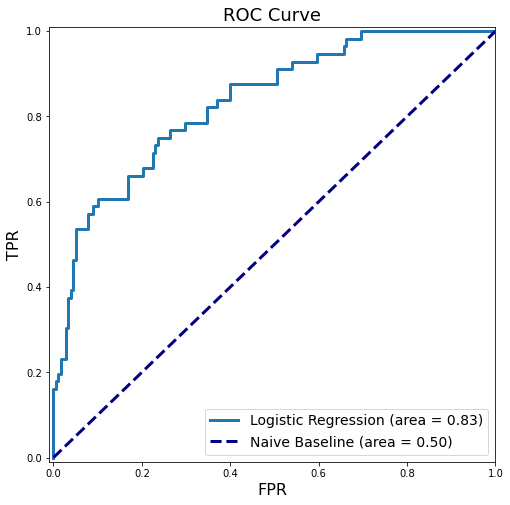

['Unnamed: 0', 'Players', 'Player_ID', 'yr1_FG_zscore', 'yr1_FGA_zscore', 'yr1_FGz_zscore', 'yr1_3P_zscore', 'yr1_3PA_zscore', 'yr1_3Pz_zscore', 'yr1_2P_zscore', 'yr1_2PA_zscore', 'yr1_2Pz_zscore', 'yr1_eFGz_zscore', 'yr1_FT_zscore', 'yr1_FTA_zscore', 'yr1_FTz_zscore', 'yr1_ORB_zscore', 'yr1_DRB_zscore', 'yr1_TRB_zscore', 'yr1_AST_zscore', 'yr1_STL_zscore', 'yr1_BLK_zscore', 'yr1_TOV_zscore', 'yr1_PF_zscore', 'Year1', 'yr2_FG_zscore', 'yr2_FGA_zscore', 'yr2_FGz_zscore', 'yr2_3P_zscore', 'yr2_3PA_zscore', 'yr2_3Pz_zscore', 'yr2_2P_zscore', 'yr2_2PA_zscore', 'yr2_2Pz_zscore', 'yr2_eFGz_zscore', 'yr2_FT_zscore', 'yr2_FTA_zscore', 'yr2_FTz_zscore', 'yr2_ORB_zscore', 'yr2_DRB_zscore', 'yr2_TRB_zscore', 'yr2_AST_zscore', 'yr2_STL_zscore', 'yr2_BLK_zscore', 'yr2_TOV_zscore', 'yr2_PF_zscore', 'Year2']


In [46]:
y_train = all_star_train['Is_Allstar']
X_train = all_star_train.drop(['Is_Allstar'], axis=1)
y_test = all_star_test['Is_Allstar']
X_test = all_star_test.drop(['Is_Allstar'], axis=1)
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')
plt.legend(loc='lower right', fontsize=14)
plt.show()
# The ROC curve plots the TPR and FPR for every break-even threshold p between 0.0 and 1.0
print(list(X_train.columns))

## Classification Tree Model

In [47]:
y_train = all_star_train['Is_Allstar']
X_train = all_star_train.drop(['Is_Allstar', 'Player_ID', 'Players', 'Unnamed: 0', "Year1", "Year2"], axis=1)
y_test = all_star_test['Is_Allstar']
X_test = all_star_test.drop(['Is_Allstar', 'Player_ID', 'Players', 'Unnamed: 0', "Year1", "Year2"], axis=1)

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

grid_values = {'ccp_alpha': np.linspace(0, 0.002, 10)}

dtc = DecisionTreeClassifier(random_state=88)
dtc_cv = GridSearchCV(dtc, param_grid=grid_values, verbose = 2, cv=5).fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ......................................ccp_alpha=0.0; total time=   0.0s
[CV] END ......................................ccp_alpha=0.0; total time=   0.0s
[CV] END ......................................ccp_alpha=0.0; total time=   0.0s
[CV] END ......................................ccp_alpha=0.0; total time=   0.0s
[CV] END ......................................ccp_alpha=0.0; total time=   0.0s
[CV] END ...................ccp_alpha=0.00022222222222222223; total time=   0.0s
[CV] END ...................ccp_alpha=0.00022222222222222223; total time=   0.0s
[CV] END ...................ccp_alpha=0.00022222222222222223; total time=   0.0s
[CV] END ...................ccp_alpha=0.00022222222222222223; total time=   0.0s
[CV] END ...................ccp_alpha=0.00022222222222222223; total time=   0.0s
[CV] END ...................ccp_alpha=0.00044444444444444447; total time=   0.0s
[CV] END ...................ccp_alpha=0.00044444

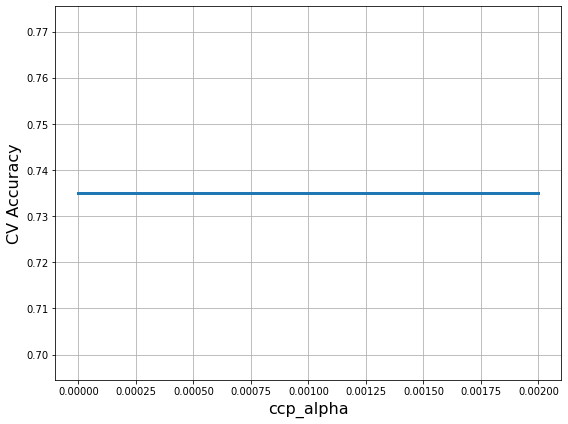

Best ccp_alpha {'ccp_alpha': 0.0}


In [49]:
ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
ACC_scores = dtc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alpha, ACC_scores, s=3)
plt.plot(ccp_alpha, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best ccp_alpha', dtc_cv.best_params_)

Node count = 111


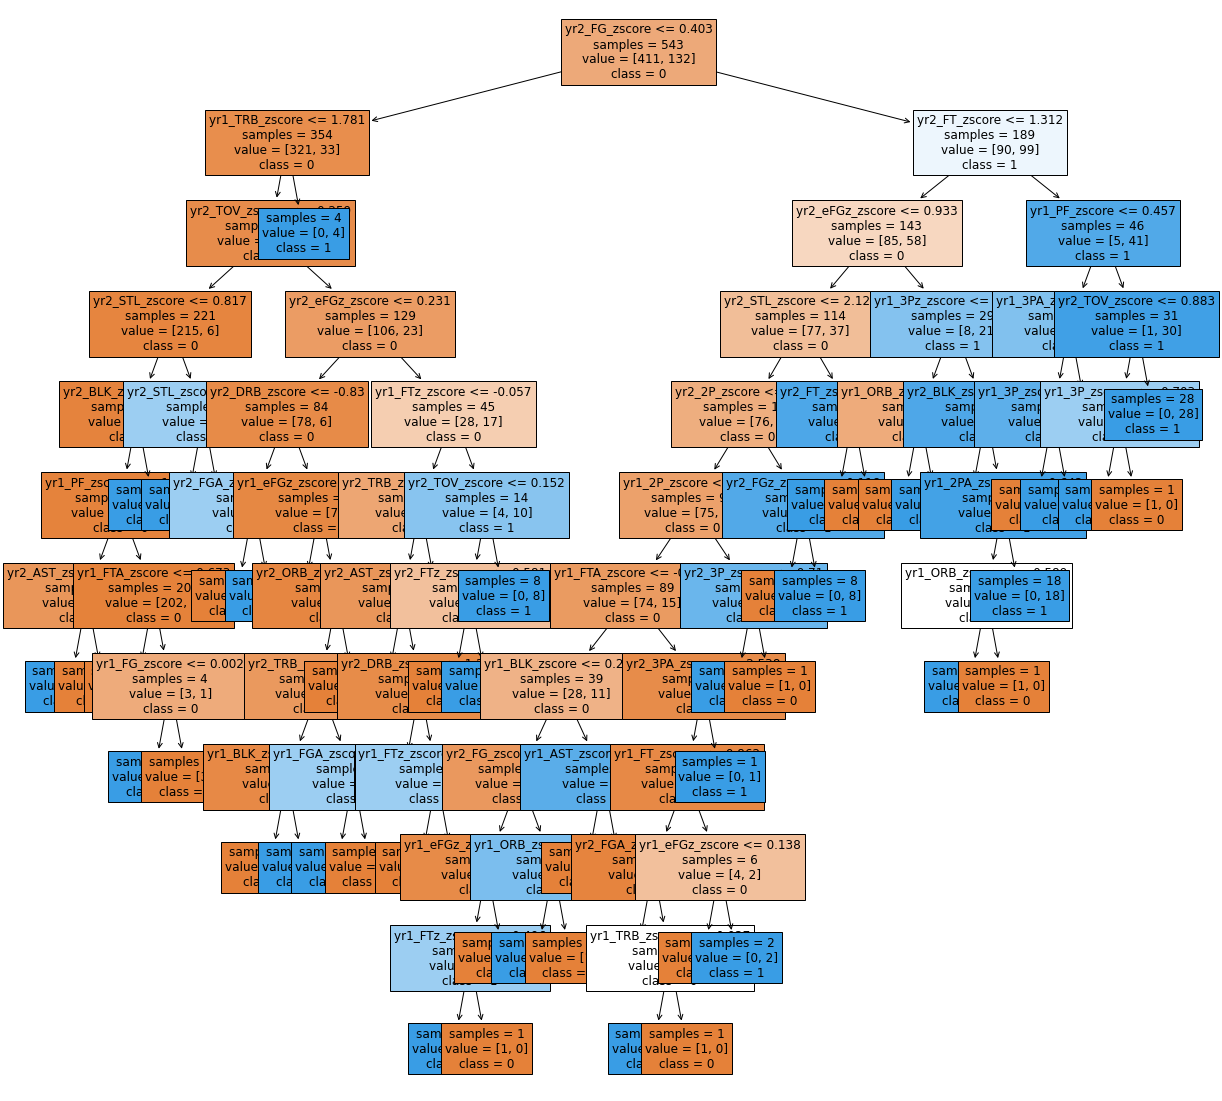

In [50]:
from sklearn.tree import plot_tree

print('Node count =', dtc_cv.best_estimator_.tree_.node_count)
plt.figure(figsize=(20,20))
plot_tree(dtc_cv.best_estimator_, 
          feature_names=X_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          fontsize=12) 
plt.show()

## Random Forest Model

In [51]:
num_features = len(X_train.iloc[0])

In [52]:
# This takes 5-10 minutes to run

import time
from sklearn.ensemble import RandomForestClassifier




grid_values = {'max_features': np.linspace(1,num_features,num_features, dtype='int32'),
               'min_samples_leaf': [5],
               'n_estimators': [500],
               'random_state': [88]} 

tic = time.time()

rf = RandomForestClassifier() 
rf_cv = GridSearchCV(rf, param_grid=grid_values, verbose = 2, cv=5)
rf_cv.fit(X_train, y_train)

toc = time.time()

print('time:', round(toc-tic, 2),'s')

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.8s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.9s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.0s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.8s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.9s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.0s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.0s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.0s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.0s
[CV] END max_features=2, min_samples_leaf=5, n_

[CV] END max_features=17, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.6s
[CV] END max_features=17, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.6s
[CV] END max_features=17, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.5s
[CV] END max_features=18, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.6s
[CV] END max_features=18, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.6s
[CV] END max_features=18, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.7s
[CV] END max_features=18, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.6s
[CV] END max_features=18, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.6s
[CV] END max_features=19, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.7s
[CV] END max_features=19, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.6s


[CV] END max_features=33, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   2.2s
[CV] END max_features=34, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   2.5s
[CV] END max_features=34, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   2.4s
[CV] END max_features=34, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   2.6s
[CV] END max_features=34, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   2.3s
[CV] END max_features=34, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   2.3s
[CV] END max_features=35, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   2.5s
[CV] END max_features=35, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   2.5s
[CV] END max_features=35, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   2.6s
[CV] END max_features=35, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   2.4s


## Gradient Boosting Model

In [53]:
# This cell takes 3-7 minutes to run

from sklearn.ensemble import GradientBoostingClassifier

grid_values = {'n_estimators': np.linspace(100, 1000, 10, dtype='int32'),  # np.logspace(6, 12, num=7, base=2, dtype='int32'),
               'learning_rate': [0.01],
               'max_leaf_nodes': np.linspace(2, 5, 4, dtype='int32'),
               'max_depth': [50],
               'min_samples_leaf': [10],
               'random_state': [88]} 

tic = time.time()

gbc = GradientBoostingClassifier()
gbc_cv = GridSearchCV(gbc, param_grid=grid_values, cv=3, verbose = 2)
gbc_cv.fit(X_train, y_train)

toc = time.time()

print('time:', round(toc-tic, 2),'s')

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] END learning_rate=0.01, max_depth=50, max_leaf_nodes=2, min_samples_leaf=10, n_estimators=100, random_state=88; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=50, max_leaf_nodes=2, min_samples_leaf=10, n_estimators=100, random_state=88; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=50, max_leaf_nodes=2, min_samples_leaf=10, n_estimators=100, random_state=88; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=50, max_leaf_nodes=2, min_samples_leaf=10, n_estimators=200, random_state=88; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=50, max_leaf_nodes=2, min_samples_leaf=10, n_estimators=200, random_state=88; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=50, max_leaf_nodes=2, min_samples_leaf=10, n_estimators=200, random_state=88; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=50, max_leaf_nodes=2, min_samples_leaf=10, n_estimators=300, random_state=88; total

[CV] END learning_rate=0.01, max_depth=50, max_leaf_nodes=4, min_samples_leaf=10, n_estimators=100, random_state=88; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=50, max_leaf_nodes=4, min_samples_leaf=10, n_estimators=100, random_state=88; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=50, max_leaf_nodes=4, min_samples_leaf=10, n_estimators=100, random_state=88; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=50, max_leaf_nodes=4, min_samples_leaf=10, n_estimators=200, random_state=88; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=50, max_leaf_nodes=4, min_samples_leaf=10, n_estimators=200, random_state=88; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=50, max_leaf_nodes=4, min_samples_leaf=10, n_estimators=200, random_state=88; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=50, max_leaf_nodes=4, min_samples_leaf=10, n_estimators=300, random_state=88; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=50, max_l

# Model Evaluation using the test set

In [54]:
from sklearn.metrics import confusion_matrix


#Input: confusion matrix from the sklearn.metrics.confusion_matrix func, type = list of list (list<list>)
#Output: (return value) list with accuracy, TPR, FPR, TNR, and FNR ([accuracy, TPR, FPR, TNR, FNR])
def cm_eval(cm):
    
    tn, fp, fn, tp = cm.ravel()
    
    acc = (tn + tp) / (tn + fp + fn + tp)
    TPR = tp / (tp + fn)
    FPR = fp / (tn + fp)
    TNR = tn / (tn + fp)
    FNR = fn / (tp + fn)
    
    return [acc, TPR, FPR, TNR, FNR]

#Input: List of numbers from a confusion matrix in the order of [TN, FP, FN, TP]. type = list
#Output: (return value) list with accuracy, TPR, FPR, TNR, and FNR ([accuracy, TPR, FPR, TNR, FNR]), type = list
def cm_eval_list(cm):
    
    tn, fp, fn, tp = cm[0], cm[1], cm[2], cm[3]
    
    acc = (tn + tp) / (tn + fp + fn + tp)
    TPR = tp / (tp + fn)
    FPR = fp / (tn + fp)
    TNR = tn / (tn + fp)
    FNR = fn / (tp + fn)
    
    return [acc, TPR, FPR, TNR, FNR]

In [55]:
def OSR2_df(model, X_test, y_test, y_train):
    
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

In [56]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

def OS_R_squared(predictions, y_test,y_train):
    SSE = np.sum((y_test-predictions)**2)
    SST = np.sum((y_test-np.mean(y_train))**2)
    r2 = 1-SSE/SST
    return r2

def mean_squared_error(predictions, y_test,y_train):
    MSE = np.mean((y_test-predictions)**2)
    return MSE

def mean_absolute_error(predictions, y_test,y_train):
    MAE = np.mean(np.abs(y_test-predictions))
    return MAE

def accuracy(predictions, y_test, y_train):
    return accuracy_score(y_test, predictions)

def fpr(predictions, y_test, y_train):
    cm = confusion_matrix(y_test, predictions)
    tn, fp, fn, tp = cm.ravel()
    FPR = fp / (tn + fp)
#     print("FPR: ", FPR)


    return FPR

def tpr(predictions, y_test, y_train):
    cm = confusion_matrix(y_test, predictions)
    tn, fp, fn, tp = cm.ravel()
    TPR = tp / (tp + fn)
#     print("TPR: ", TPR)
    return TPR

In [57]:
#Logistic Regression Model

logReg_y_prob = logreg.predict(X_test)
logReg_y_pred = pd.Series([1 if x >= .5 else 0 for x in logReg_y_prob])

lg_cm = confusion_matrix(y_test, logReg_y_pred)
lg_acc, lg_TPR, lg_FPR, lg_TNR, lg_FNR = cm_eval(lg_cm)
lg_mae = mean_absolute_error(y_test, logReg_y_pred, y_train)
lg_OSR2 = OSR2_df(logreg, X_test, y_test, y_train)

In [58]:
# Classification Tree

dtc_y_pred = dtc_cv.predict(X_test)
# dtc_y_pred = pd.Series([1 if x >= .5 else 0 for x in logReg_y_prob])

dtc_cm = confusion_matrix(y_test, dtc_y_pred)
dtc_acc, dtc_TPR, dtc_FPR, dtc_TNR, dtc_FNR = cm_eval(dtc_cm)
dtc_mae = mean_absolute_error(y_test, dtc_y_pred, y_train)
dtc_OSR2 = OSR2_df(dtc_cv, X_test, y_test, y_train)

In [59]:
# Random Forest

concat_test_X_rf = X_test[list(X_train.columns)]
concat_test_y_rf = y_test

rf_y_pred = rf_cv.predict(X_test)
# dtc_y_pred = pd.Series([1 if x >= .5 else 0 for x in logReg_y_prob])

rf_cm = confusion_matrix(y_test, rf_y_pred)
rf_acc, rf_TPR, rf_FPR, rf_TNR, rf_FNR = cm_eval(rf_cm)
rf_mae = mean_absolute_error(y_test, rf_y_pred, y_train)
rf_OSR2 = OSR2_df(rf_cv, X_test, y_test, y_train)

In [60]:
# Gradient Boosting

gbc_y_pred = gbc_cv.predict(X_test)

gbc_cm = confusion_matrix(y_test, gbc_y_pred)
gbc_acc, gbc_TPR, gbc_FPR, gbc_TNR, gbc_FNR = cm_eval(gbc_cm)
gbc_mae = mean_absolute_error(y_test, gbc_y_pred, y_train)
gbc_OSR2 = OSR2_df(gbc_cv, X_test, y_test, y_train)

In [61]:
data = {'Logistic Regression Model': [lg_mae, lg_OSR2, lg_acc, lg_TPR, lg_FPR, lg_TNR, lg_FNR],
        'Classification Tree Model': [dtc_mae, dtc_OSR2, dtc_acc, dtc_TPR, dtc_FPR, dtc_TNR, dtc_FNR],
        'Random Forest Model': [rf_mae, rf_OSR2, rf_acc, rf_TPR, rf_FPR, rf_TNR, rf_FNR],
        'Gradient Boosting Model' : [gbc_mae, gbc_OSR2, gbc_acc, gbc_TPR, gbc_FPR, gbc_TNR, gbc_FNR]
         
        }

comparison_table = pd.DataFrame(data=data, index=['MAE', 'OSR2','Accuracy', 'TPR', 'FPR', 'TNR', 'FNR'])
comparison_table

Logistic Regression Model  Classification Tree Model  \
MAE                        0.242424                   0.205128   
OSR2                       0.281695                  -0.126717   
Accuracy                   0.829060                   0.794872   
TPR                        0.535714                   0.482143   
FPR                        0.078652                   0.106742   
TNR                        0.921348                   0.893258   
FNR                        0.464286                   0.517857   

          Random Forest Model  Gradient Boosting Model  
MAE                  0.175214                 0.175214  
OSR2                 0.037596                 0.037596  
Accuracy             0.824786                 0.824786  
TPR                  0.392857                 0.392857  
FPR                  0.039326                 0.039326  
TNR                  0.960674                 0.960674  
FNR                  0.607143                 0.607143

## Bootstrap Validation

In [65]:
def bootstrap_validation(test_data, test_label, train_label, model, metrics_list, sample=500, random_state=66):
    tic = time.time()
    n_sample = sample
    n_metrics = len(metrics_list)
    output_array=np.zeros([n_sample, n_metrics])
    output_array[:]=np.nan
    print(output_array.shape)
    counter = 0
    for bs_iter in range(n_sample):
        counter += 1
        bs_index = np.random.choice(test_data.index, len(test_data.index), replace=True)
        bs_data = test_data.loc[bs_index]
        bs_label = test_label.loc[bs_index]
        bs_predicted = [1 if x > 1/3 else 0 for x in model.predict(bs_data)]
        print("iteration: ", counter)
        for metrics_iter in range(n_metrics):
            metrics = metrics_list[metrics_iter]
            met = metrics(bs_predicted,bs_label,train_label)
            output_array[bs_iter, metrics_iter]=met
    output_df = pd.DataFrame(output_array)
    return output_df

In [66]:
bs_output = bootstrap_validation(X_test,y_test,y_train,logreg,
                                 metrics_list=[OS_R_squared, mean_squared_error, mean_absolute_error, accuracy , fpr, tpr ],
                                 sample = 3000)

(3000, 6)
iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7
iteration:  8
iteration:  9
iteration:  10
iteration:  11
iteration:  12
iteration:  13
iteration:  14
iteration:  15
iteration:  16
iteration:  17
iteration:  18
iteration:  19
iteration:  20
iteration:  21
iteration:  22
iteration:  23
iteration:  24
iteration:  25
iteration:  26
iteration:  27
iteration:  28
iteration:  29
iteration:  30
iteration:  31
iteration:  32
iteration:  33
iteration:  34
iteration:  35
iteration:  36
iteration:  37
iteration:  38
iteration:  39
iteration:  40
iteration:  41
iteration:  42
iteration:  43
iteration:  44
iteration:  45
iteration:  46
iteration:  47
iteration:  48
iteration:  49
iteration:  50
iteration:  51
iteration:  52
iteration:  53
iteration:  54
iteration:  55
iteration:  56
iteration:  57
iteration:  58
iteration:  59
iteration:  60
iteration:  61
iteration:  62
iteration:  63
iteration:  64
iteration:  65
iteration:  66
iteration

iteration:  522
iteration:  523
iteration:  524
iteration:  525
iteration:  526
iteration:  527
iteration:  528
iteration:  529
iteration:  530
iteration:  531
iteration:  532
iteration:  533
iteration:  534
iteration:  535
iteration:  536
iteration:  537
iteration:  538
iteration:  539
iteration:  540
iteration:  541
iteration:  542
iteration:  543
iteration:  544
iteration:  545
iteration:  546
iteration:  547
iteration:  548
iteration:  549
iteration:  550
iteration:  551
iteration:  552
iteration:  553
iteration:  554
iteration:  555
iteration:  556
iteration:  557
iteration:  558
iteration:  559
iteration:  560
iteration:  561
iteration:  562
iteration:  563
iteration:  564
iteration:  565
iteration:  566
iteration:  567
iteration:  568
iteration:  569
iteration:  570
iteration:  571
iteration:  572
iteration:  573
iteration:  574
iteration:  575
iteration:  576
iteration:  577
iteration:  578
iteration:  579
iteration:  580
iteration:  581
iteration:  582
iteration:  583
iteratio

iteration:  1034
iteration:  1035
iteration:  1036
iteration:  1037
iteration:  1038
iteration:  1039
iteration:  1040
iteration:  1041
iteration:  1042
iteration:  1043
iteration:  1044
iteration:  1045
iteration:  1046
iteration:  1047
iteration:  1048
iteration:  1049
iteration:  1050
iteration:  1051
iteration:  1052
iteration:  1053
iteration:  1054
iteration:  1055
iteration:  1056
iteration:  1057
iteration:  1058
iteration:  1059
iteration:  1060
iteration:  1061
iteration:  1062
iteration:  1063
iteration:  1064
iteration:  1065
iteration:  1066
iteration:  1067
iteration:  1068
iteration:  1069
iteration:  1070
iteration:  1071
iteration:  1072
iteration:  1073
iteration:  1074
iteration:  1075
iteration:  1076
iteration:  1077
iteration:  1078
iteration:  1079
iteration:  1080
iteration:  1081
iteration:  1082
iteration:  1083
iteration:  1084
iteration:  1085
iteration:  1086
iteration:  1087
iteration:  1088
iteration:  1089
iteration:  1090
iteration:  1091
iteration:  10

iteration:  1517
iteration:  1518
iteration:  1519
iteration:  1520
iteration:  1521
iteration:  1522
iteration:  1523
iteration:  1524
iteration:  1525
iteration:  1526
iteration:  1527
iteration:  1528
iteration:  1529
iteration:  1530
iteration:  1531
iteration:  1532
iteration:  1533
iteration:  1534
iteration:  1535
iteration:  1536
iteration:  1537
iteration:  1538
iteration:  1539
iteration:  1540
iteration:  1541
iteration:  1542
iteration:  1543
iteration:  1544
iteration:  1545
iteration:  1546
iteration:  1547
iteration:  1548
iteration:  1549
iteration:  1550
iteration:  1551
iteration:  1552
iteration:  1553
iteration:  1554
iteration:  1555
iteration:  1556
iteration:  1557
iteration:  1558
iteration:  1559
iteration:  1560
iteration:  1561
iteration:  1562
iteration:  1563
iteration:  1564
iteration:  1565
iteration:  1566
iteration:  1567
iteration:  1568
iteration:  1569
iteration:  1570
iteration:  1571
iteration:  1572
iteration:  1573
iteration:  1574
iteration:  15

iteration:  2002
iteration:  2003
iteration:  2004
iteration:  2005
iteration:  2006
iteration:  2007
iteration:  2008
iteration:  2009
iteration:  2010
iteration:  2011
iteration:  2012
iteration:  2013
iteration:  2014
iteration:  2015
iteration:  2016
iteration:  2017
iteration:  2018
iteration:  2019
iteration:  2020
iteration:  2021
iteration:  2022
iteration:  2023
iteration:  2024
iteration:  2025
iteration:  2026
iteration:  2027
iteration:  2028
iteration:  2029
iteration:  2030
iteration:  2031
iteration:  2032
iteration:  2033
iteration:  2034
iteration:  2035
iteration:  2036
iteration:  2037
iteration:  2038
iteration:  2039
iteration:  2040
iteration:  2041
iteration:  2042
iteration:  2043
iteration:  2044
iteration:  2045
iteration:  2046
iteration:  2047
iteration:  2048
iteration:  2049
iteration:  2050
iteration:  2051
iteration:  2052
iteration:  2053
iteration:  2054
iteration:  2055
iteration:  2056
iteration:  2057
iteration:  2058
iteration:  2059
iteration:  20

iteration:  2485
iteration:  2486
iteration:  2487
iteration:  2488
iteration:  2489
iteration:  2490
iteration:  2491
iteration:  2492
iteration:  2493
iteration:  2494
iteration:  2495
iteration:  2496
iteration:  2497
iteration:  2498
iteration:  2499
iteration:  2500
iteration:  2501
iteration:  2502
iteration:  2503
iteration:  2504
iteration:  2505
iteration:  2506
iteration:  2507
iteration:  2508
iteration:  2509
iteration:  2510
iteration:  2511
iteration:  2512
iteration:  2513
iteration:  2514
iteration:  2515
iteration:  2516
iteration:  2517
iteration:  2518
iteration:  2519
iteration:  2520
iteration:  2521
iteration:  2522
iteration:  2523
iteration:  2524
iteration:  2525
iteration:  2526
iteration:  2527
iteration:  2528
iteration:  2529
iteration:  2530
iteration:  2531
iteration:  2532
iteration:  2533
iteration:  2534
iteration:  2535
iteration:  2536
iteration:  2537
iteration:  2538
iteration:  2539
iteration:  2540
iteration:  2541
iteration:  2542
iteration:  25

iteration:  2971
iteration:  2972
iteration:  2973
iteration:  2974
iteration:  2975
iteration:  2976
iteration:  2977
iteration:  2978
iteration:  2979
iteration:  2980
iteration:  2981
iteration:  2982
iteration:  2983
iteration:  2984
iteration:  2985
iteration:  2986
iteration:  2987
iteration:  2988
iteration:  2989
iteration:  2990
iteration:  2991
iteration:  2992
iteration:  2993
iteration:  2994
iteration:  2995
iteration:  2996
iteration:  2997
iteration:  2998
iteration:  2999
iteration:  3000


In [67]:
# The 95% confidence interval
CI= np.quantile(bs_output.iloc[:,0],np.array([0.025,0.975]))
print("The 95-percent confidence interval of OSR2 is %s" % CI)

The 95-percent confidence interval of OSR2 is [-0.53829542  0.08318396]


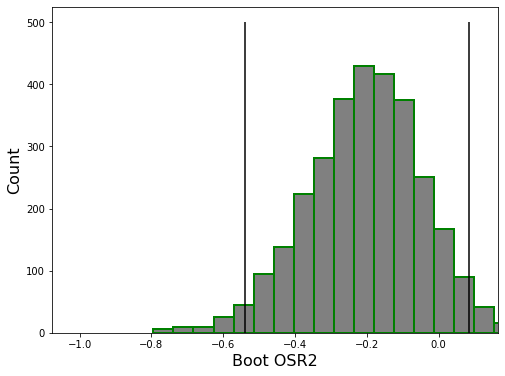

In [68]:
fig, axs = plt.subplots(ncols=1, figsize=(8,6))
axs.set_xlabel('Boot OSR2', fontsize=16)
axs.set_ylabel('Count', fontsize=16)
axs.hist(bs_output.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs.set_xlim(CI *2)
axs.vlines(x=CI[0], ymin = 0, ymax =500, color = "black")
axs.vlines(x=CI[1], ymin = 0, ymax =500, color = "black")

In [69]:
# The 95% confidence interval
CI= np.quantile(bs_output.iloc[:,1],np.array([0.025,0.975]))
print("The 95-percent confidence interval of OSR2 is %s" % CI)
np.array([1,2]) + np.array([-.4,.5])


The 95-percent confidence interval of OSR2 is [0.16666667 0.27350427]


array([0.6, 2.5])

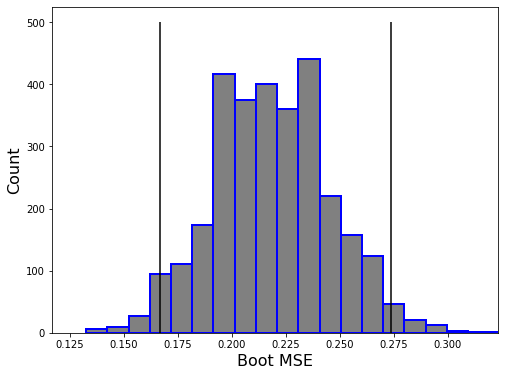

In [70]:
fig, axs = plt.subplots(ncols=1, figsize=(8,6))
axs.set_xlabel('Boot MSE', fontsize=16)
axs.set_ylabel('Count', fontsize=16)
axs.hist(bs_output.iloc[:,1], bins=20,edgecolor='blue', linewidth=2,color = "grey")
axs.set_xlim(CI + np.array([-.05,.05]))
axs.vlines(x=CI[0], ymin = 0, ymax =500, color = "black")
axs.vlines(x=CI[1], ymin = 0, ymax =500, color = "black")

In [71]:
# The 95% confidence interval
CI= np.quantile(bs_output.iloc[:,2],np.array([0.025,0.975]))
print("The 95-percent confidence interval of MAE is %s" % CI)

The 95-percent confidence interval of MAE is [0.16666667 0.27350427]


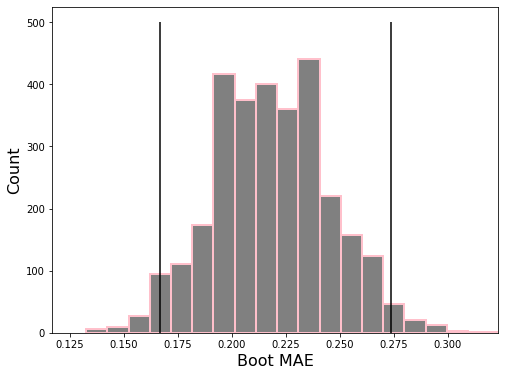

In [72]:
fig, axs = plt.subplots(ncols=1, figsize=(8,6))
axs.set_xlabel('Boot MAE', fontsize=16)
axs.set_ylabel('Count', fontsize=16)
axs.hist(bs_output.iloc[:,2], bins=20,edgecolor='pink', linewidth=2,color = "grey")
axs.set_xlim(CI + np.array([-.05,.05]))
axs.vlines(x=CI[0], ymin = 0, ymax =500, color = "black")
axs.vlines(x=CI[1], ymin = 0, ymax =500, color = "black")

In [73]:
# The 95% confidence interval
CI= np.quantile(bs_output.iloc[:,3],np.array([0.025,0.975]))
print("The 95-percent confidence interval of MAE is %s" % CI)

The 95-percent confidence interval of MAE is [0.72649573 0.83333333]


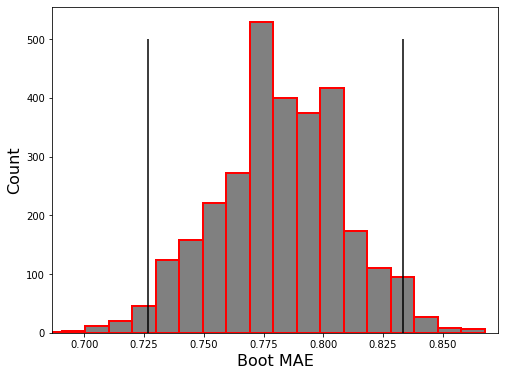

In [74]:
fig, axs = plt.subplots(ncols=1, figsize=(8,6))
axs.set_xlabel('Boot MAE', fontsize=16)
axs.set_ylabel('Count', fontsize=16)
axs.hist(bs_output.iloc[:,3], bins=20,edgecolor='red', linewidth=2,color = "grey")
axs.set_xlim(CI + np.array([-.04,.04]))
axs.vlines(x=CI[0], ymin = 0, ymax =500, color = "black")
axs.vlines(x=CI[1], ymin = 0, ymax =500, color = "black")

In [75]:
# The 95% confidence interval
CI= np.quantile(bs_output.iloc[:,4],np.array([0.025,0.975]))
print("The 95-percent confidence interval of FPR is %s" % CI)

The 95-percent confidence interval of FPR is [0.11046512 0.22099593]


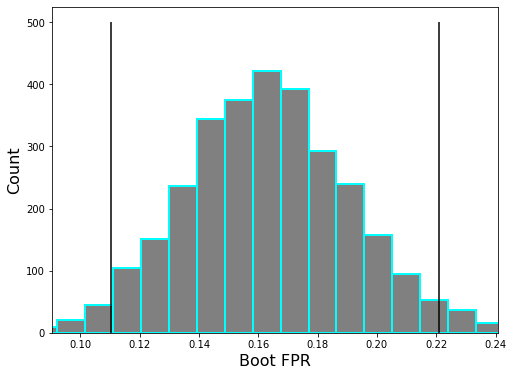

In [76]:
fig, axs = plt.subplots(ncols=1, figsize=(8,6))
axs.set_xlabel('Boot FPR', fontsize=16)
axs.set_ylabel('Count', fontsize=16)
axs.hist(bs_output.iloc[:,4], bins=20,edgecolor='cyan', linewidth=2,color = "grey")
axs.set_xlim(CI + np.array([-.02,.02]))
axs.vlines(x=CI[0], ymin = 0, ymax =500, color = "black")
axs.vlines(x=CI[1], ymin = 0, ymax =500, color = "black")

# Model Creation: Hall of Fame Models

In [77]:
hof_example = hof_df[hof_df["In_HoF"] == 1]
hof_example_2 = hof_df[hof_df["In_HoF"] == 0]
hof_example_3 = pd.concat([hof_example_2.head(30),hof_example])
hof_example_train, hof_example_test = train_test_split(hof_example_3, test_size=0.4, random_state=88)
hof_example_train.columns = hof_example_train.columns.str.replace("%","z")
hof_example_test.columns = hof_example_test.columns.str.replace("%","z")
hof_example_train

Players  Player_ID  In_HoF  yr1_FG_zscore  yr1_FGA_zscore  \
27        alleniverson  iversal01       1       2.019653        2.448575   
191       johnstockton  stockjo01       1      -0.541295       -0.558961   
149       reggiemiller  millere01       1      -0.087756       -0.109720   
29   shareefabdurrahim  abdursh01       0       1.584553        1.658186   
12        manuginóbili  ginobma01       0      -0.560226       -0.558704   
14       antawnjamison  jamisan01       0      -0.075347       -0.114815   
8      mettaworldpeace  artesro01       0       0.167746        0.378288   
16       jasonwilliams  willija02       0       0.497791        0.985544   
1           barondavis  davisba01       0      -0.580376       -0.522227   
168        chrismullin  mullich01       1      -0.223158       -0.138937   
13           mikebibby  bibbymi01       0       0.811395        0.926332   
30      stephonmarbury  marbust01       0       0.453293        0.723346   
22        nazrmohammed  mohamna01       0      -0.514607       -0.598903   
10          jefffoster  fosteje01       0      -0.941499       -1.001303   
6           jasonterry  terryja01       0      -0.185697       -0.060920   
142      davidrobinson  robinda01       1       1.878879        1.628026   
25      anthonyjohnson  johnsan02       0      -0.293461        0.016418   
26      stephenjackson  jacksst02       0      -0.138267       -0.075266   
7        coreymaggette  maggeco01       0      -0.332965       -0.422784   
4          andremiller  millean02       0       0.344468        0.367239   
11     andreikirilenko  kirilan01       0       0.081596        0.072303   
173          joedumars  dumarjo01       1      -0.223158       -0.201668   
58           granthill   hillgr01       1       1.347519        1.336718   
158       dennisrodman  rodmade01       1      -0.548509       -0.700421   
5          shawnmarion  mariosh01       0      -0.344747       -0.417259   
57           jasonkidd   kiddja01       1       0.294147        0.741847   
97      dikembemutombo  mutomdi01       1       0.600973        0.541328   
20     rashonesterović  nestera01       0      -0.438998       -0.522227   
144      scottiepippen  pippesc01       1      -0.323534       -0.276806   
182     hakeemolajuwon  olajuha01       1       1.599391        1.410243   
15         vincecarter  cartevi01       0       1.730580        1.720762   
37           stevenash   nashst01       1      -1.176881       -1.173588   
24       cuttinomobley  moblecu01       0      -0.140231       -0.060537   

     yr1_FGz_zscore  yr1_3P_zscore  yr1_3PA_zscore  yr1_3Pz_zscore  \
27        -0.770903       2.012272        2.326339        0.425447   
191        0.093396      -0.380456       -0.276601       -0.163390   
149        0.258343       2.197778        2.272080        1.040059   
29        -0.020891      -0.733439       -0.720973       -0.051009   
12        -0.072367       0.241309        0.277458        0.621654   
14         0.215317      -0.731757       -0.757210        0.359853   
8         -0.863270       0.539268        0.764674        0.350515   
16        -1.509676       2.607771        3.165658        0.414545   
1         -0.587001      -0.284260        0.059801       -0.176388   
168       -0.455006      -0.159667        0.049110        0.152925   
13        -0.271219      -0.318620        0.044910       -0.170659   
30        -0.933067       1.029011        1.137317        0.500982   
22         0.754604      -0.811785       -0.860949       -1.506270   
10         0.577413      -0.767264       -0.810138        0.288207   
6         -0.693258       0.209857        0.465103        0.226190   
142        1.272898      -0.597087       -0.664216       -1.157267   
25        -1.696825       0.200426        0.275957        0.653624   
26        -0.397141       0.345781        0.443191        0.595652   
7          0.645586      -0.825436       -0.821290       -0.430959   
4          0.029293      -0.63

In [79]:
hof_train, hof_test = train_test_split(hof_df, test_size=0.4, random_state=88)
hof_train.shape, hof_test.shape
hof_df

Players  Player_ID  In_HoF  yr1_FG_zscore  yr1_FGA_zscore  \
0         eltonbrand  brandel01       0       2.058670        1.889276   
1         barondavis  davisba01       0      -0.580376       -0.522227   
2          lamarodom   odomla01       0       0.992448        1.110303   
3    richardhamilton  hamilri01       0      -0.156244       -0.047109   
4        andremiller  millean02       0       0.344468        0.367239   
..               ...        ...     ...            ...             ...   
213    vinniejohnson  johnsvi01       0       0.454757        0.283567   
214        jimpaxson  paxsoji02       0      -0.786270       -0.651730   
215     billlaimbeer  laimbbi01       0       0.031087       -0.021189   
216   jamesdonaldson  donalja01       0      -1.043586       -1.166011   
217        markeaton  eatonma01       0      -0.952222       -0.863543   

     yr1_FG%_zscore  yr1_3P_zscore  yr1_3PA_zscore  yr1_3P%_zscore  \
0          0.730592      -0.872494       -0.900588       -1.508446   
1         -0.587001      -0.284260        0.059801       -0.176388   
2         -0.204474       0.515738        0.526779        0.622847   
3         -0.587001      -0.213672       -0.239770        0.646528   
4          0.029293      -0.637201       -0.486475       -0.300713   
..              ...            ...             ...             ...   
213        1.155580      -0.323431       -0.391557        0.369772   
214       -1.518724      -0.383606        0.014800       -0.746468   
215        0.495698      -0.439221       -0.579790       -0.824666   
216        1.325872      -0.439221       -0.579790       -0.824666   
217       -1.362690      -0.516626       -0.601422       -0.894499   

     yr1_2P_zscore  ...  yr10_FT%_zscore  yr10_ORB_zscore  yr10_DRB_zscore  \
0         2.431825  ...         0.303002         2.525366         1.653416   
1        -0.543808  ...         0.001754        -0.548713        -0.214636   
2         0.921990  ...        -0.556087         1.602701         2.758970   
3        -0.109731  ...         0.864987        -0.581300        -0.431168   
4         0.538240  ...         0.656293         0.705875         0.181095   
..             ...  ...              ...              ...              ...   
213       0.471873  ...        -0.812709         0.009482        -0.549234   
214      -0.768269  ...         0.601656        -1.235079        -1.232299   
215       0.050976  ...         1.102100         0.810778         2.645632   
216      -1.029846  ...        -0.483280         0.658808         1.692657   
217      -0.940372  ...        -1.591339         0.486444         0.768325   

     yr10_TRB_zscore  yr10_AST_zscore  yr10_STL_zscore  yr10_BLK_zscore  \
0           2.024720        -0.240624         1.245252         2.049832   
1          -0.337237         2.379023         1.716487         0.009488   
2           2.505939         0.749571         0.672790         0.656552   
3          -0.504713         0.976031        -0.417269        -0.859252   
4           0.365079         2.605977         1.747866        -0.579013   
..               ...              ...              ...              ...   
213        -0.377207         0.334646         0.110933        -0.516941   
214        -1.279255        -0.509801        -0.717310        -0.670492   
215         2.111406        -0.133455        -0.223365         0.876511   
216         1.399017        -0.768736        -1.059111         0.150346   
217         0.688628        -0.897173        -0.711820         3.261083   

     yr10_TOV_zscore  yr10_PF_zscore  yr10_PTS_zscore  
0           0.073689        1.817680         1.113576  
1           1.645779        0.760038         0.502977  
2           0.851032        1.344730         0.291584  
3           0.608940        0.451690         1.058383  
4           1.749463        0.814452         1.300428  
..               ...             ...              ...  
213         0.039355       -0.517599        -0.065555

In [81]:
# Basic string manipulation for building the model
hof_train.columns = hof_train.columns.str.replace("%","z")
hof_test.columns = hof_test.columns.str.replace("%","z")
def formula_from_cols_2(df, y):
    return y + ' ~ ' + ' + '.join([col for col in df.columns
                                   if not ((col == 'Unnamed: 0') or (col == 'Year2') or (col == 'Year1') or (col == 'yr1_Player_ID')
                                    or (col == 'Players') or (col == 'Player_ID') or (col == 'In_HoF')) ])
all_formula = formula_from_cols_2(hof_example_train, 'In_HoF')
all_formula

'In_HoF ~ yr1_FG_zscore + yr1_FGA_zscore + yr1_FGz_zscore + yr1_3P_zscore + yr1_3PA_zscore + yr1_3Pz_zscore + yr1_2P_zscore + yr1_2PA_zscore + yr1_2Pz_zscore + yr1_eFGz_zscore + yr1_FT_zscore + yr1_FTA_zscore + yr1_FTz_zscore + yr1_ORB_zscore + yr1_DRB_zscore + yr1_TRB_zscore + yr1_AST_zscore + yr1_STL_zscore + yr1_BLK_zscore + yr1_TOV_zscore + yr1_PF_zscore + yr1_PTS_zscore + yr2_FG_zscore + yr2_FGA_zscore + yr2_FGz_zscore + yr2_3P_zscore + yr2_3PA_zscore + yr2_3Pz_zscore + yr2_2P_zscore + yr2_2PA_zscore + yr2_2Pz_zscore + yr2_eFGz_zscore + yr2_FT_zscore + yr2_FTA_zscore + yr2_FTz_zscore + yr2_ORB_zscore + yr2_DRB_zscore + yr2_TRB_zscore + yr2_AST_zscore + yr2_STL_zscore + yr2_BLK_zscore + yr2_TOV_zscore + yr2_PF_zscore + yr2_PTS_zscore + yr3_FG_zscore + yr3_FGA_zscore + yr3_FGz_zscore + yr3_3P_zscore + yr3_3PA_zscore + yr3_3Pz_zscore + yr3_2P_zscore + yr3_2PA_zscore + yr3_2Pz_zscore + yr3_eFGz_zscore + yr3_FT_zscore + yr3_FTA_zscore + yr3_FTz_zscore + yr3_ORB_zscore + yr3_DRB_zscore 

In [82]:
logreg2 = smf.logit(formula = all_formula,
                       data = hof_train,
                       maxiter = 45).fit()
print(logreg2.summary())

AttributeError: 'int' object has no attribute 'ndim'

We tried working with the data to make Hall of Fame prediction models, but informtunately we could not figure out why our data was incompatible with logistic regression. We spent many hours trying to resolve this issue, but after days of trying to figure out why it would not work, we decided to focus more attention on the all-star models.

# Model Prediction on Current Data

In [83]:
draft_class_2019 = pd.read_csv('data/2019_draft_data.csv')

In [84]:
file_2019_20 = pd.read_csv('data/seasons/2019-20.csv')
file_2020_21 = pd.read_csv('data/seasons/2020-21.csv')

file_2019_20 = file_2019_20[(file_2019_20['G'] >= 20) & (file_2019_20['MP'] >= 10)]
file_2020_21 = file_2020_21[(file_2020_21['G'] >= 20) & (file_2020_21['MP'] >= 10)]

In [85]:
file_2019_draft_data = pd.read_csv('data/2019_draft_data.csv')



In [86]:
file_2019_20 = file_2019_20[file_2019_20['Player'].isin(file_2019_all_star_data['Player'])]

NameError: name 'file_2019_all_star_data' is not defined

In [87]:
prediction_years = [file_2019_20.fillna(0), file_2020_21.fillna(0)]
zscores_dict_prediction = []
column_names_keep = file_2019_20.columns[:8]
for year in prediction_years:
    new_temp_df = year[column_names_keep]
    for col in column_names_zscore:
        col_name = col + "_zscore"
        new_temp_df[col_name] = spt.zscore(year[col])
    zscores_dict_prediction.append(new_temp_df.reset_index())
zscores_dict_prediction[0]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


index   Rk                              Player Pos  Age   Tm   G  GS  \
0        0    1              Steven Adams\adamsst01   C   26  OKC  63  63   
1        1    2               Bam Adebayo\adebaba01  PF   22  MIA  72  72   
2        2    3         LaMarcus Aldridge\aldrila01   C   34  SAS  53  53   
3        4    5  Nickeil Alexander-Walker\alexani01  SG   21  NOP  47   1   
4        5    6             Grayson Allen\allengr01  SG   24  MEM  38   0   
..     ...  ...                                 ...  ..  ...  ...  ..  ..   
454    645  524            Thaddeus Young\youngth01  PF   31  CHI  64  16   
455    646  525                Trae Young\youngtr01  PG   21  ATL  60  60   
456    647  526               Cody Zeller\zelleco01   C   27  CHO  58  39   
457    649  528                Ante Žižić\zizican01   C   23  CLE  22   0   
458    650  529               Ivica Zubac\zubaciv01   C   22  LAC  72  70   

       MP  FG_zscore  ...  FT%_zscore  ORB_zscore  DRB_zscore  TRB_zscore  \
0    1680   0.594255  ...   -1.545108    3.571320    1.733610    2.336243   
1    2417   1.691177  ...   -0.556423    2.871583    3.266932    3.308819   
2    1754   1.348826  ...    0.677166    1.223815    1.004654    1.114124   
3     591  -0.698296  ...   -0.692481   -0.897969   -0.788411   -0.856622   
4     718  -0.565547  ...    1.039986   -0.920541   -0.771654   -0.850223   
..    ...        ...  ...         ...         ...         ...         ...   
454  1591   0.496441  ...   -1.536038    1.020665    0.434895    0.621438   
455  2120   2.431774  ...    0.976492   -0.378809    0.451652    0.237526   
456  1341   0.370679  ...   -0.638058    2.510428    0.686259    1.235696   
457   221  -1.096541  ...   -0.139180   -0.694820   -1.014639   -0.971795   
458  1326   0.265877  ...   -0.048475    3.345599    1.482246    2.080302   

     AST_zscore  STL_zscore  BLK_zscore  TOV_zscore  PF_zscore  PTS_zscore  
0      0.256746    0.547362    1.726249    0.512405   0.423465    0.352523  
1      2.238408    1.791517    2.768760    2.628152   1.620695    1.499111  
2      0.104997   -0.054649    2.528181    0.127724   0.543188    1.139251  
3     -0.252059   -0.817196   -0.639449   -0.256957  -0.873535   -0.682385  
4     -0.582336   -1.098134   -0.880028   -0.660872  -0.953350   -0.526032  
..          ...         ...         ...         ...        ...         ...  
454   -0.002120    2.192858   -0.038000    0.666278   0.662911    0.290478  
455    3.952278    1.109238   -0.639449    4.263047   0.064296    3.067604  
456   -0.260986    0.105887    0.042193    0.146958   0.782634    0.248287  
457   -0.992951   -1.218536   -0.759738   -1.103255  -1.472150   -1.106771  
458   -0.314544   -0.857330    1.686153   -0.122319   1.341341    0.134125  

[459 rows x 31 columns]

In [94]:
pred_stat_columns = zscores_dict_prediction[0].columns[9:]
pred_all_star_data = []

prediction_player_list = file_2019_draft_data["Player"]


for player in prediction_player_list:
    player_row = player.split("\\")
    for year in zscores_dict_prediction:
        if player in list(year["Player"]):
            player_row += list(year[year.Player == player].values[0][9:])
    pred_all_star_data.append(player_row)

In [97]:
pred_all_star_data = [x for x in pred_all_star_data if len(x) == 46]
pred_all_star_data

[['Zion Williamson',
  'willizi01',
  0.0842216867793535,
  -0.23256695584636286,
  1.6490410744816322,
  -0.9948048618630462,
  -1.0888820410920015,
  0.9596383404044172,
  0.575949819376881,
  0.3859039262039445,
  0.9210614246652181,
  1.0688485760705064,
  0.3112979044950003,
  0.6057976790851676,
  -1.0190190036776154,
  0.34350022475979175,
  -0.6962442493169133,
  -0.43431917984836954,
  -0.6001889129120925,
  -0.8573295769717834,
  -0.599352080356995,
  -0.16078666230764133,
  -1.1728423331423194,
  -0.004855446240777343,
  3.2729977201223037,
  2.240351384206207,
  2.100439560552335,
  -0.8856193821213919,
  -0.9248711899451194,
  0.006377537916037091,
  4.495261574661166,
  3.7632125493765236,
  1.3526674437629953,
  1.4322486941934036,
  3.7950517581241154,
  4.547746268219751,
  -0.5577430481758032,
  2.6509159418683064,
  1.1044949767496053,
  1.6311052388345515,
  1.0270036997616194,
  0.9456968500188052,
  0.7512778096517216,
  2.175147997144919,
  1.2721156310852737,
  

In [98]:
pred_col_names = ["Player", "Player_ID"]
yr1 = ["yr1_" + x for x in pred_stat_columns]
yr2 = ["yr2_" + x for x in pred_stat_columns]
pred_col_names = pred_col_names + yr1 + yr2

In [99]:
pred_all_star_df = pd.DataFrame(data = pred_all_star_data, columns = pred_col_names)
pred_all_star_df.columns = pred_all_star_df.columns.str.replace("%","z")
pred_all_star_df

Player  Player_ID  yr1_FG_zscore  yr1_FGA_zscore  \
0            Zion Williamson  willizi01       0.084222       -0.232567   
1             Brandon Clarke  clarkbr01       0.685083        0.159260   
2                  Ja Morant  moranja01       1.740084        1.667301   
3               Jaxson Hayes  hayesja02      -0.167302       -0.565126   
4            Cameron Johnson  johnsca02      -0.153328       -0.084397   
5           Matisse Thybulle  thybuma01      -0.600481       -0.545370   
6             Daniel Gafford  gaffoda01      -0.726243       -0.976709   
7               Terance Mann   mannte01      -1.124488       -1.157806   
8              Rui Hachimura  hachiru01       0.391639        0.376576   
9                 RJ Barrett  barrerj01       0.657136        0.975841   
10               Tyler Herro  herroty01       0.503427        0.659746   
11                Coby White  whiteco01       0.796871        1.189865   
12             Eric Paschall  pascher01       0.838792        0.689380   
13            Grant Williams  willigr01      -0.775150       -0.723174   
14               Cody Martin  martico01      -0.761177       -0.736345   
15              Goga Bitadze  bitadgo01      -0.893925       -0.924027   
16           De'Andre Hunter  huntede01       0.573295        0.830964   
17             Nassir Little  littlna01      -0.928859       -0.920734   
18                 Ty Jerome  jeromty01      -1.117501       -1.045855   
19            Bruno Fernando  fernabr01      -0.663362       -0.762686   
20  Nickeil Alexander-Walker  alexani01      -0.698296       -0.542078   
21            Carsen Edwards  edwarca01      -1.089554       -0.996465   
22              Jordan Poole  poolejo01      -0.216209        0.234992   
23             Darius Bazley  bazleda01      -0.509653       -0.374152   
24              Justin James  jamesju01      -1.138462       -1.141343   
25               Cam Reddish  reddica01       0.105182        0.406210   
26            Darius Garland  garlada01       0.573295        0.883647   
27            Jarrett Culver  culveja01       0.223957        0.455600   
28           Sekou Doumbouya  doumbse01      -0.740216       -0.640858   

    yr1_FGz_zscore  yr1_3P_zscore  yr1_3PA_zscore  yr1_3Pz_zscore  \
0         1.649041      -0.994805       -1.088882        0.959638   
1         2.115595      -0.680038       -0.732190        0.343837   
2         0.236050       0.005042        0.088202        0.132705   
3         2.835420      -1.087383       -1.160220       -0.615054   
4        -0.323814       0.856764        0.751649        0.616549   
5        -0.483775      -0.069020       -0.068743        0.326243   
6         3.221993      -1.105899       -1.188756       -2.814345   
7         0.116079      -0.976289       -1.046079        0.264662   
8         0.089419      -0.643007       -0.568112       -0.289559   
9        -0.763707       0.060589        0.216611        0.000747   
10       -0.417125       1.041921        0.937129        0.607752   
11       -0.870348       1.356688        1.493568        0.299851   
12        0.502652      -0.420818       -0.268490       -0.289559   
13       -0.630406      -0.661522       -0.503907       -0.615054   
14       -0.390465      -0.772617       -0.639450       -0.755809   
15        0.102749      -0.957773       -0.889135       -1.142884   
16       -0.657067       0.893796        0.979932        0.308648   
17       -0.390465      -0.846679       -0.767859       -0.729417   
18       -1.643494      -0.846679       -0.832064       -0.351139   
19        0.782584      -1.013321       -0.924804       -1.626728   
20       -1.216931      -0.254177       -0.239955        0.229474   
21       -1.750135      -0.661522       -0.646584       -0.034441   
22       -1.683484       0.264262        0.701712       -0.359936   
23       -0.870348      -0.198630       -0.182884        0.247068   
24       -0.563756      -0.939258       -0.981874       -0.087224   
25     

In [101]:
X_pred = pred_all_star_df.drop(['Player', 'Player_ID'], axis=1)
lg_predictions = logreg.predict(X_pred)
lg_predictions = [1 if x >1/3 else 0 for x in lg_predictions]
lg_predictions

[1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0]

In [102]:
prdiction_df  =  pd.DataFrame(columns = ["Player", "Predicted All Star"])
prdiction_df["Player"] = pred_all_star_df["Player"]
prdiction_df["Predicted All Star"] = lg_predictions
prdiction_df

Player  Predicted All Star
0            Zion Williamson                   1
1             Brandon Clarke                   1
2                  Ja Morant                   1
3               Jaxson Hayes                   0
4            Cameron Johnson                   0
5           Matisse Thybulle                   0
6             Daniel Gafford                   0
7               Terance Mann                   0
8              Rui Hachimura                   0
9                 RJ Barrett                   1
10               Tyler Herro                   0
11                Coby White                   0
12             Eric Paschall                   0
13            Grant Williams                   0
14               Cody Martin                   0
15              Goga Bitadze                   0
16           De'Andre Hunter                   0
17             Nassir Little                   0
18                 Ty Jerome                   0
19            Bruno Fernando                   0
20  Nickeil Alexander-Walker                   0
21            Carsen Edwards                   0
22              Jordan Poole                   0
23             Darius Bazley                   0
24              Justin James                   0
25               Cam Reddish                   0
26            Darius Garland                   1
27            Jarrett Culver                   0
28           Sekou Doumbouya                   0